What problem are you trying to solve?

Answer: We want to identify the top factors that affect life expectancy the most. 

In [31]:
import numpy as np
import pandas as pd

In [32]:
train = pd.read_csv('train_South_America.csv') 
print(train)

    Life Expectancy at birth        BMI  Alcohol  gender_dummy  2000  2010  \
0                      59.81  23.600000    12.36             0     1     0   
1                      79.77  27.000000     3.73             1     1     0   
2                      81.34  26.400000     3.24             1     0     0   
3                      78.60  26.800000     2.81             1     0     0   
4                      68.23  26.900000     9.39             1     0     1   
..                       ...        ...      ...           ...   ...   ...   
62                     78.85  26.000000     2.94             1     0     0   
63                     80.56  27.200000     3.42             1     0     0   
64                     79.39  25.966667     3.22             1     0     0   
65                     70.82  26.500000    13.80             0     0     1   
66                     77.55  26.100000    10.80             0     0     0   

    2015  2019  Infectious_and_parasitic_diseases  Respiratory_

In [33]:
test = pd.read_csv('test_South_America.csv')
print(test)

    Life Expectancy at birth        BMI  Alcohol  gender_dummy  2000  2010  \
0                      78.09  27.066667    13.74             0     0     0   
1                      72.47  25.900000    11.85             0     0     1   
2                      75.94  25.700000     9.99             1     1     0   
3                      78.63  26.900000     4.47             1     0     1   
4                      73.51  27.066667    14.66             0     0     0   
5                      81.01  26.500000     9.03             1     0     0   
6                      71.15  24.533333     1.84             0     0     0   
7                      72.14  27.200000    14.17             0     0     1   
8                      72.54  26.600000    11.26             0     0     1   
9                      72.57  24.800000     2.63             0     1     0   
10                     78.80  26.100000     3.95             1     1     0   
11                     68.50  24.866667    11.74             0  

In [34]:
trainSA_frame = pd.DataFrame(train)
testSA_frame = pd.DataFrame(test)

In [35]:
trainSA_frame

,Life Expectancy at birth,BMI,Alcohol,gender_dummy,2000,2010,2015,2019,Infectious_and_parasitic_diseases,Respiratory_infectious,...,unintentional_injuries,intentional_injuries,mental_substance_disorders,sense_organ,musculoskeletal,congenital,sudden_infant_death_syndrome,skin_diseases,diabetes_mellitus,oral_conditions
0,59.81,23.600000,12.36,0,1,0,0,0,0.395459,0.188927,...,0.323860,0.287597,0.016199,0.000000,0.004247,0.058702,0.000558,0.004990,0.145302,0.000000
1,79.77,27.000000,3.73,1,1,0,0,0,0.617318,2.419916,...,1.221185,0.324850,0.070878,0.002971,0.278149,0.495611,0.050709,0.230431,1.038031,0.005298
2,81.34,26.400000,3.24,1,0,0,0,1,2.011912,8.112224,...,2.806691,0.788284,0.266336,0.000000,0.195777,0.892246,0.025139,0.092833,2.389806,0.000000
3,78.60,26.800000,2.81,1,0,0,1,0,0.502450,0.549448,...,0.600834,0.189357,0.046251,0.001176,0.162436,0.297279,0.006647,0.073974,1.189711,0.001208
4,68.23,26.900000,9.39,1,0,1,0,0,0.202199,0.114204,...,0.101927,0.094131,0.003340,0.000000,0.005099,0.037514,0.000409,0.003740,0.251382,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,78.85,26.000000,2.94,1,0,0,0,1,0.445310,0.757727,...,0.652050,0.177366,0.045307,0.001633,0.175951,0.289041,0.006236,0.083346,1.326207,0.000376
63,80.56,27.200000,3.42,1,0,0,1,0,0.183585,0.727927,...,0.553455,0.185792,0.037111,0.000000,0.198814,0.090416,0.003626,0.094703,0.366824,0.000000
64,79.39,25.966667,3.22,1,0,0,0,1,14.520115,48.203698,...,20.689473,9.534382,1.790568,0.049048,4.209804,5.430157,0.091620,4.001976,32.245043,0.025225
65,70.82,26.500000,13.80,0,0,1,0,0,2.811600,2.369205,...,10.080534,15.134189,0.187173,0.000000,0.124589,1.315405,0.011493,0.003348,3.377855,0.000000


In [36]:
y_train = trainSA_frame['Life Expectancy at birth']
X_train = trainSA_frame.drop(['Life Expectancy at birth'], axis = 1)

In [37]:
y_test = testSA_frame['Life Expectancy at birth']
X_test = testSA_frame.drop(['Life Expectancy at birth'], axis = 1)

In [38]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha=0.02,
                            random_state = 88)
dtr = dtr.fit(X_train, y_train)

Node count = 21


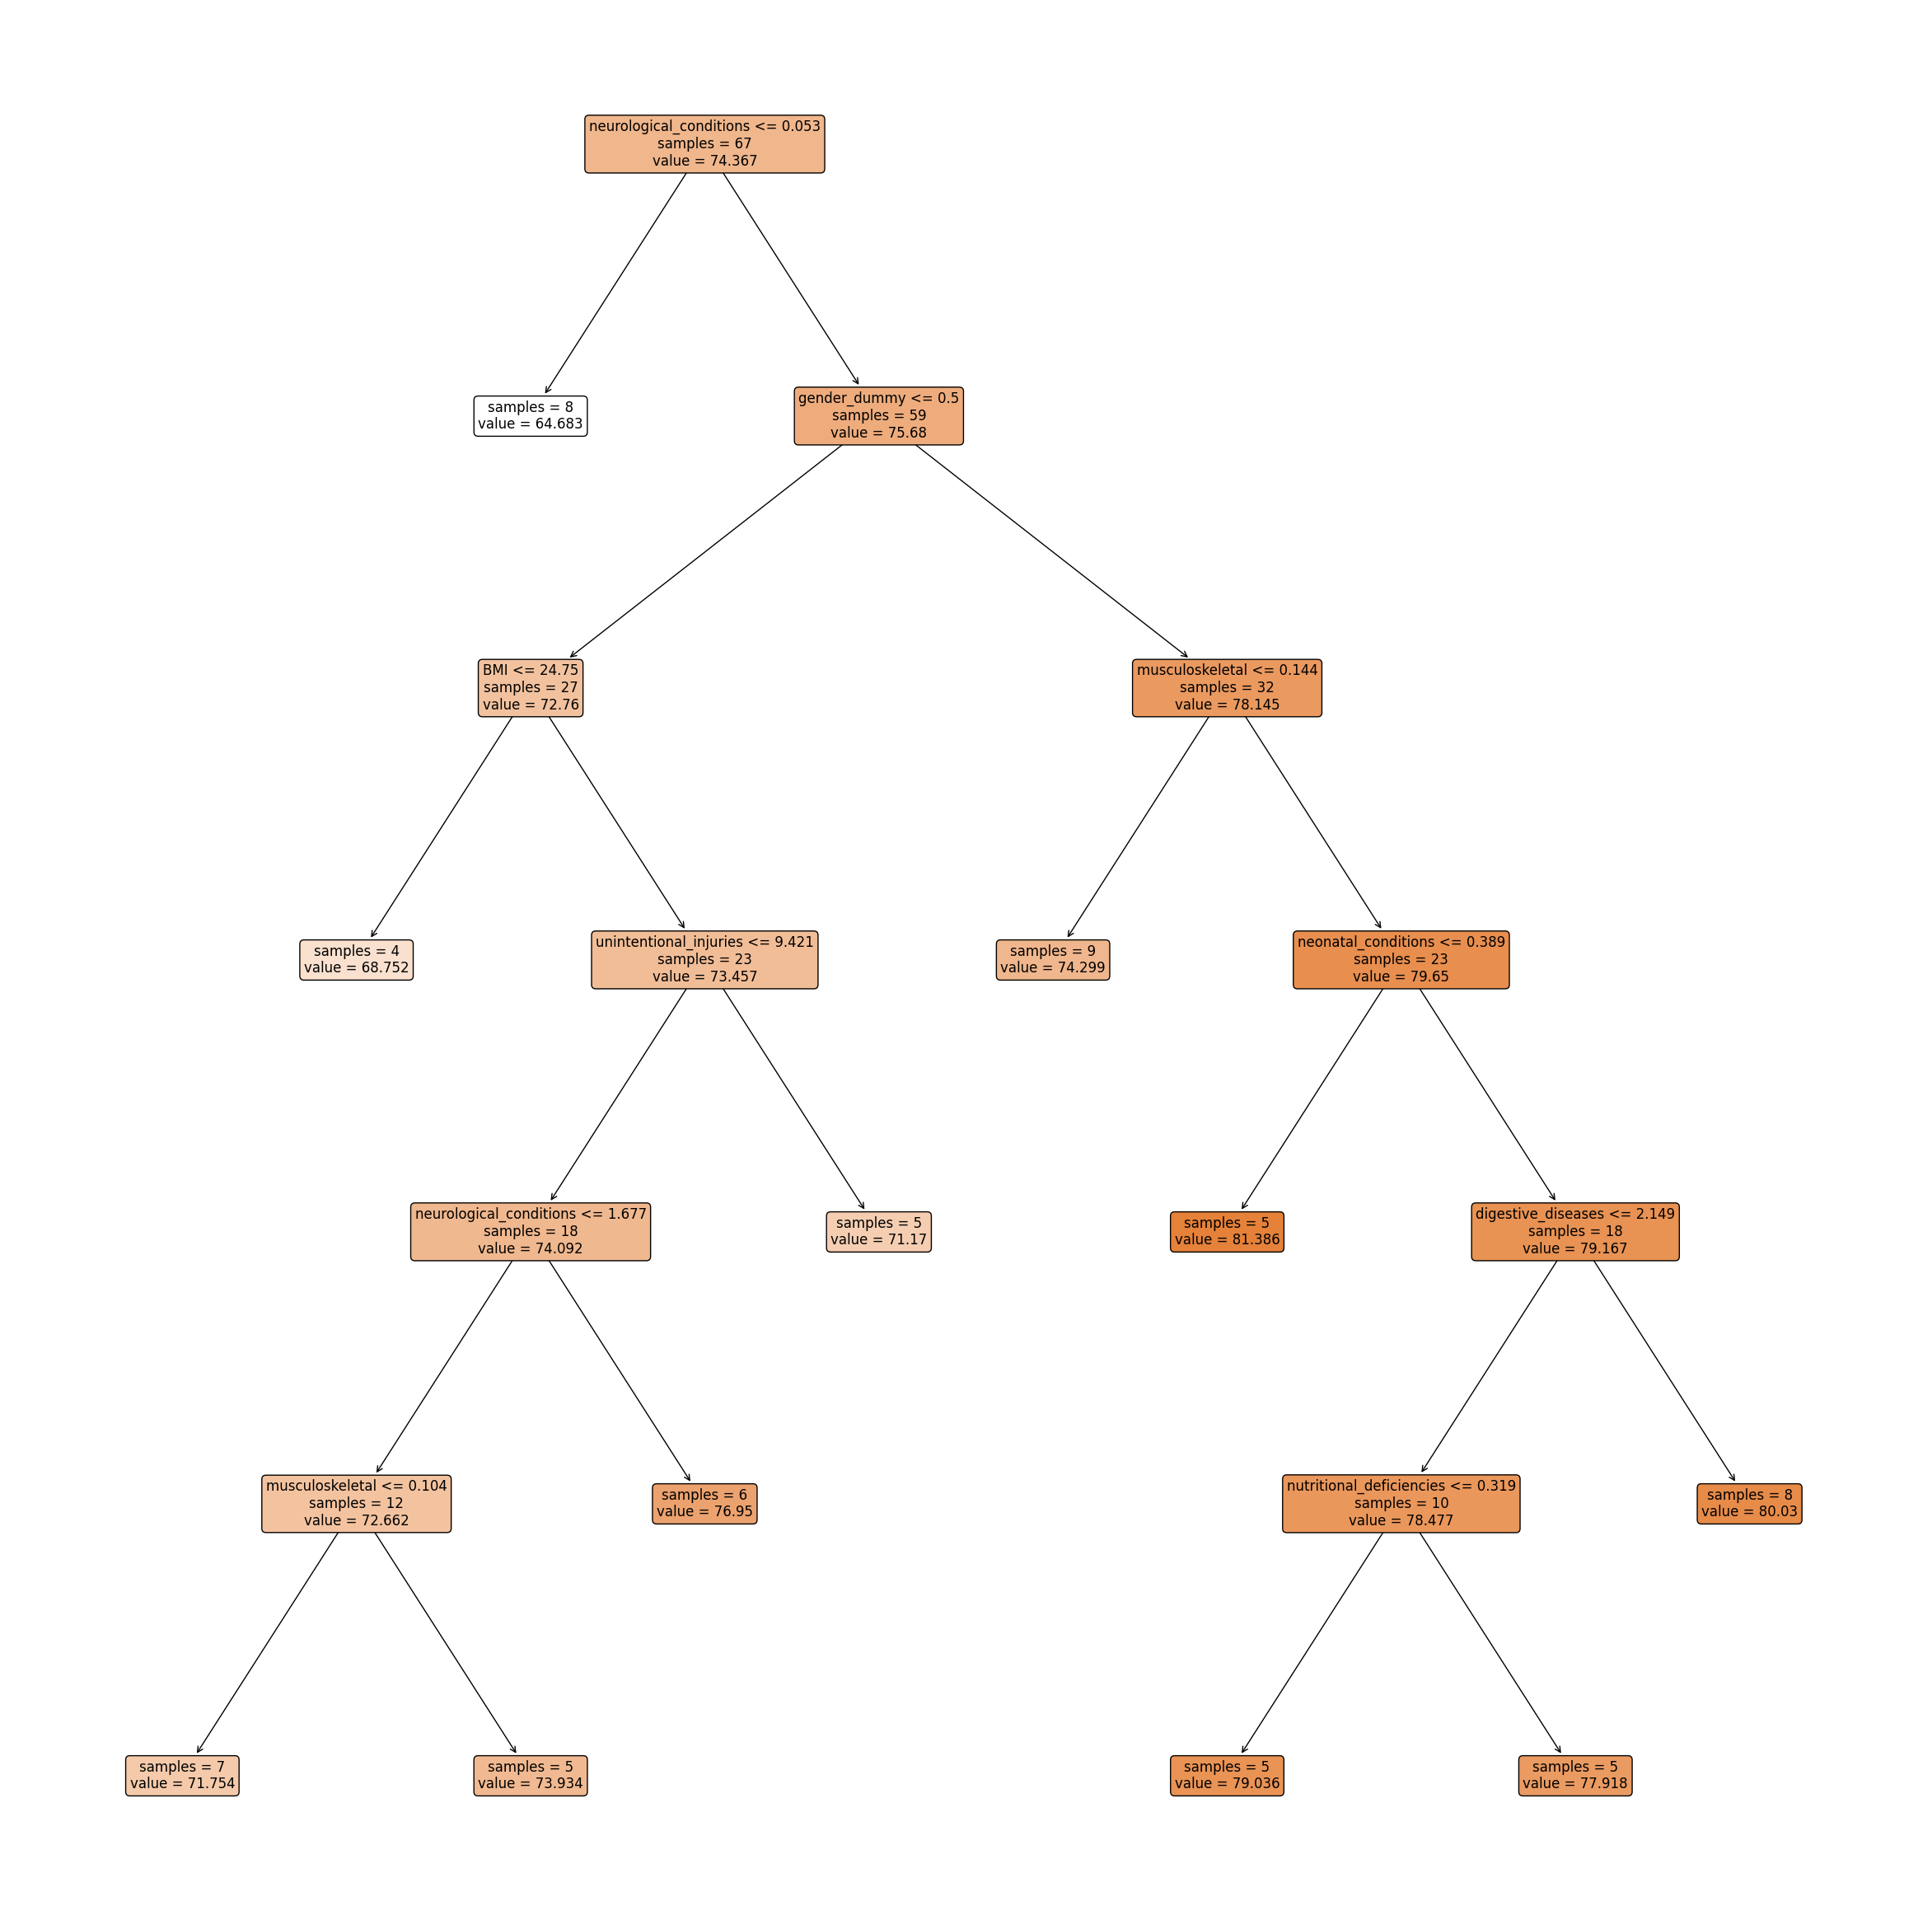

In [39]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(30,30))
plot_tree(dtr, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [40]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
    
    return (1 - SSE/SST)

In [41]:
OSR2(dtr, X_test, y_test, y_train)

0.3256735294655112

In [42]:
X_train.columns

Index(['BMI', 'Alcohol', 'gender_dummy', '2000', '2010', '2015', '2019',
       'Infectious_and_parasitic_diseases', 'Respiratory_infectious',
       'neonatal_conditions', 'nutritional_deficiencies',
       'endocrine_blood_immune_disorders', 'cardiovascular_disease',
       'respiratory_diseases', 'digestive_diseases', 'genitourinary_diseases',
       'malignant_neoplasms', 'neurological_conditions',
       'unintentional_injuries', 'intentional_injuries',
       'mental_substance_disorders', 'sense_organ', 'musculoskeletal',
       'congenital', 'sudden_infant_death_syndrome', 'skin_diseases',
       'diabetes_mellitus', 'oral_conditions'],
      dtype='object')

In [43]:
import statsmodels.formula.api as smf

In [44]:
y_col = 'Life Expectancy at birth'
X_colSA = X_train.columns.values.tolist()

def add_Q(temp_list):
    temp = temp_list.copy()
    for x in np.arange(len(temp_list)):
        temp[x] = ('Q("' +temp_list[x]+'")')
    return temp

add_Q(X_colSA)

model1 = smf.ols(formula= 'Q("'+ y_col +'")'+ ' ~ ' + ' + '.join(add_Q(X_colSA)),
                 data=trainSA_frame).fit()
print(model1.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Q("Life Expectancy at birth")   R-squared:                       0.815
Model:                                       OLS   Adj. R-squared:                  0.687
Method:                            Least Squares   F-statistic:                     6.356
Date:                           Mon, 08 May 2023   Prob (F-statistic):           1.33e-07
Time:                                   02:57:48   Log-Likelihood:                -151.31
No. Observations:                             67   AIC:                             358.6
Df Residuals:                                 39   BIC:                             420.4
Df Model:                                     27                                         
Covariance Type:                       nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      

In [45]:
OSR2(model1, X_test, y_test, y_train)

-0.094742171671782

In [46]:
from sklearn.model_selection import GridSearchCV

grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]}

dtrsa = DecisionTreeRegressor(random_state=88)
dtrsa_cv_acc = GridSearchCV(dtrsa, param_grid = grid_values, scoring = 'r2', verbose=0) # default scoring metric to optimize is accuracy, used as default if none given.
dtrsa_cv_acc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=88),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='r2')

In [47]:
# Extracting the importances by sklearn
importances = dtrsa_cv_acc.best_estimator_.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance = {}
for i, feature in enumerate(X_train.columns):
    feature_importance[feature] = importances[i]

print(f"Feature importance by sklearn: {feature_importance}")

feature_importance_sa_df = pd.DataFrame.from_dict(feature_importance, orient='index')
feature_importance_sa_df

feature_importance_sa_df['CART'] = feature_importance_sa_df[0]
feature_importance_sa_df = feature_importance_sa_df.drop([0], axis=1)
feature_importance_sa_df.sort_values(by=feature_importance_sa_df.columns.tolist(), ascending=False)

feature_importance_sa_df.sort_values(by=['CART'], ascending=False)

Feature importance by sklearn: {'BMI': 0.0, 'Alcohol': 0.0, 'gender_dummy': 0.2731692804296925, '2000': 0.0, '2010': 0.0, '2015': 0.0, '2019': 0.0, 'Infectious_and_parasitic_diseases': 0.0, 'Respiratory_infectious': 0.0, 'neonatal_conditions': 0.05958458725149706, 'nutritional_deficiencies': 0.0, 'endocrine_blood_immune_disorders': 0.0, 'cardiovascular_disease': 0.0, 'respiratory_diseases': 0.0, 'digestive_diseases': 0.0, 'genitourinary_diseases': 0.0, 'malignant_neoplasms': 0.0, 'neurological_conditions': 0.5481144961461045, 'unintentional_injuries': 0.0, 'intentional_injuries': 0.0, 'mental_substance_disorders': 0.0, 'sense_organ': 0.0, 'musculoskeletal': 0.11913163617270588, 'congenital': 0.0, 'sudden_infant_death_syndrome': 0.0, 'skin_diseases': 0.0, 'diabetes_mellitus': 0.0, 'oral_conditions': 0.0}


,CART
neurological_conditions,0.548114
gender_dummy,0.273169
musculoskeletal,0.119132
neonatal_conditions,0.059585
BMI,0.000000
genitourinary_diseases,0.000000
diabetes_mellitus,0.000000
skin_diseases,0.000000
sudden_infant_death_syndrome,0.000000
congenital,0.000000


In [48]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(random_state=88)
rf.fit(X_train, y_train)

# Calculating the mean absolute error
print('Reg Tree OSR2:', OSR2(rf, X_test, y_test, y_train))
print(f"Mean absolute error on test set: {mean_absolute_error(y_test, rf.predict(X_test))}")

features_rf = rf.feature_names_in_
importance_rf = rf.feature_importances_

for x, y in zip(features_rf, importance_rf):
  print(x, y)

Reg Tree OSR2: 0.7377132834499838
Mean absolute error on test set: 1.569272413793099
BMI 0.1295660604395015
Alcohol 0.03700729088345804
gender_dummy 0.11391532011059761
2000 0.0031927766612556557
2010 0.0004464038709635542
2015 0.0007914498164597139
2019 0.004520678931279269
Infectious_and_parasitic_diseases 0.007521271395952277
Respiratory_infectious 0.004803139824580503
neonatal_conditions 0.03694894578569522
nutritional_deficiencies 0.007842408872536464
endocrine_blood_immune_disorders 0.0552668421523018
cardiovascular_disease 0.005991443894217951
respiratory_diseases 0.011913098276104565
digestive_diseases 0.011535642963681815
genitourinary_diseases 0.011523268467496765
malignant_neoplasms 0.02192476286053021
neurological_conditions 0.19521143538287025
unintentional_injuries 0.017557193288614593
intentional_injuries 0.021662991248851828
mental_substance_disorders 0.023902405707046045
sense_organ 0.002505346667878361
musculoskeletal 0.21976307832421696
congenital 0.00552823608806785

In [51]:
# Creating a dataframe with the feature importance by sklearn
feature_importance_rf = {}
for i, feature in enumerate(features_rf):
    feature_importance_rf[feature] = importance_rf[i]

print(f"Feature importance by sklearn: {feature_importance_rf}")

feature_importance_rf_df = pd.DataFrame.from_dict(feature_importance_rf, orient='index')
feature_importance_rf_df

feature_importance_rf_df['RF Tree'] = feature_importance_rf_df[0]
feature_importance_rf_df = feature_importance_rf_df.drop([0], axis=1)
feature_importance_rf_df.sort_values(by=feature_importance_rf_df.columns.tolist(), ascending=False)

combined_df_new = feature_importance_sa_df.join(feature_importance_rf_df)
combined_df_new.sort_values(by=['RF Tree'], ascending=False)

Feature importance by sklearn: {'BMI': 0.1295660604395015, 'Alcohol': 0.03700729088345804, 'gender_dummy': 0.11391532011059761, '2000': 0.0031927766612556557, '2010': 0.0004464038709635542, '2015': 0.0007914498164597139, '2019': 0.004520678931279269, 'Infectious_and_parasitic_diseases': 0.007521271395952277, 'Respiratory_infectious': 0.004803139824580503, 'neonatal_conditions': 0.03694894578569522, 'nutritional_deficiencies': 0.007842408872536464, 'endocrine_blood_immune_disorders': 0.0552668421523018, 'cardiovascular_disease': 0.005991443894217951, 'respiratory_diseases': 0.011913098276104565, 'digestive_diseases': 0.011535642963681815, 'genitourinary_diseases': 0.011523268467496765, 'malignant_neoplasms': 0.02192476286053021, 'neurological_conditions': 0.19521143538287025, 'unintentional_injuries': 0.017557193288614593, 'intentional_injuries': 0.021662991248851828, 'mental_substance_disorders': 0.023902405707046045, 'sense_organ': 0.002505346667878361, 'musculoskeletal': 0.2197630783

,CART,RF Tree
musculoskeletal,0.119132,0.219763
neurological_conditions,0.548114,0.195211
BMI,0.000000,0.129566
gender_dummy,0.273169,0.113915
endocrine_blood_immune_disorders,0.000000,0.055267
Alcohol,0.000000,0.037007
neonatal_conditions,0.059585,0.036949
skin_diseases,0.000000,0.028386
mental_substance_disorders,0.000000,0.023902
malignant_neoplasms,0.000000,0.021925
